# P4

This projects gives you experience with getting data from APIs. 



## Twitter Data

Since we'll be looking at Twitter data, we need to download the data from Twitter!

Twitter provides an [API](https://developer.twitter.com/en/docs/twitter-api) for downloading tweet data, look up users, and more. The [`tweepy` package](https://docs.tweepy.org/en/stable/index.html) makes it fairly easy to use.

## Autograder Setup

Code establishing a condition so that you don't have to worry about commenting out lines of code before submitting.

### `Tweepy`

Import `tweepy` (you will want to specify the latest version).  Instructions on using tweepy are available [here](https://docs.tweepy.org/en/stable/index.html), but you will also get some example code.

Twitter requires you to have authentication keys to access their API. To get your keys, you'll have to sign up as a Twitter developer.


In [4]:
import tweepy
if tweepy.__version__ != '4.11.0': 
    !pip install tweepy==4.11.0

In [ ]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [ ]:
import re
import os
if re.search(r'amzn', os.uname().release): 
    GS = True
else: 
    GS = False
GS

False

In [ ]:
if IN_COLAB == True: 
    print("Installing otter:")
    !pip install otter-grader 

Installing otter:
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 204 kB 7.2 MB/s 
     |████████████████████████████████| 98 kB 8.8 MB/s 
     |████████████████████████████████| 297 kB 51.0 MB/s 
     |████████████████████████████████| 1.6 MB 43.4 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 46 kB 4.0 MB/s 


In [ ]:
if GS==False:
    !wget https://pages.mtu.edu/~lebrown/un5550-f22/projects/p4/p4.files.zip
    !unzip p4.files.zip

--2022-11-14 00:30:02--  https://pages.mtu.edu/~lebrown/un5550-f22/projects/p4/p4.files.zip
Resolving pages.mtu.edu (pages.mtu.edu)... 141.219.70.232
Connecting to pages.mtu.edu (pages.mtu.edu)|141.219.70.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84248 (82K) [application/zip]
Saving to: ‘p4.files.zip’

p4.files.zip        100%[===================>]  82.27K  --.-KB/s    in 0.06s   

2022-11-14 00:30:02 (1.30 MB/s) - ‘p4.files.zip’ saved [84248/84248]

Archive:  p4.files.zip
  inflating: game1Tweets.pkl         
  inflating: p4.otter                
   creating: tests/
  inflating: tests/q1.py             
  inflating: tests/q4.py             
  inflating: tests/q7.py             
  inflating: tests/q6.py             
  inflating: tests/q2.py             


Let's get the rest of the imports set up:

In [1]:
import pandas as pd 
import requests 
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import json
import pickle 
from pathlib import Path
import datetime
import re
import itertools 
import collections
import nltk

import otter
grader = otter.Notebook()

### Twitter API Access 

In P4a assignment, you were asked to get your authentication keys (bearer token, consumer key and secret, access token and secret). 

**IMPORTANT NOTE.  DO NOT SKIP ME.**

If someone has your authentication keys, they can access your Twitter account and post as you!  So don't give them to anyone, and **do not write them down in this notebook**.  The usual way to store sensitive information like this is to put it in a separate file and read it programmatically.  That way, you can share the rest of your code without sharing your keys.  That's why we're asking you to put your keys in `keys.json` for this assignment.

**SECOND IMPORTANT NOTE**

Twitter limits developers to a certain rate of requests for data.  If you make too many requests in a short period of time, you'll have to wait awhile (around 15 minutes) before you can make more.  So carefully follow the code examples you see and don't rerun cells without thinking.  Instead, always save the data you've collected to a file.  You are provided templates to help you do that.

### Load Key Information 




Copy and paste the key information (never upload your key information to the Drive). 


In [2]:
GS=False
if GS==False: 
    # Get Key Info 
    from getpass import getpass
    keys = {}
    keys["bearer_token"] = getpass("Enter Twitter Bearer Token:    ")
    keys["consumer_key"] = getpass("Enter Twitter Consumer Key:    ")
    keys["consumer_secret"] = getpass("Enter Twitter Consumer Secret: ")
    keys["access_token"] = getpass("Enter Twitter Access Token:    ")
    keys["access_token_secret"] = getpass("Enter Twitter Access Token Secret: ")

Enter Twitter Bearer Token:    ········
Enter Twitter Consumer Key:    ········
Enter Twitter Consumer Secret: ········
Enter Twitter Access Token:    ········
Enter Twitter Access Token Secret: ········


### Example - Get some Tweets

In the example below, load some tweets by `@packers`.  Run it, inspect the output, and read the code.   

 

In [5]:
# Authenticating: 
client = tweepy.Client(bearer_token=keys["bearer_token"], 
                       consumer_key=keys["consumer_key"], 
                       consumer_secret=keys["consumer_secret"], 
                       access_token=keys["access_token"], 
                       access_token_secret=keys["access_token_secret"], 
                       return_type = requests.Response,
                       wait_on_rate_limit=True)
    

In [13]:
# Look up user_id for 'packers' username 
packerInfoResp = client.get_user(username = 'packers')

# Explore a bit in what is returned:
print(packerInfoResp)  # this is a response 
print(packerInfoResp.text)

packerInfo = json.loads(packerInfoResp.text)

print(packerInfo['data']['id'])  # Get the user_id 

<Response [200]>
{"data":{"id":"35865630","name":"Green Bay Packers","username":"packers"}}
35865630


In [14]:
ds_tweets_save_path = "Packers_recent_tweets.pkl"

# Guarding against attempts to download the data multiple times: 
if not Path(ds_tweets_save_path).is_file():
    # use keys loaded above

   # Getting as recent tweets by @packers 
    temp = client.get_users_tweets(id=packerInfo['data']['id'])
    example_tweets = json.loads(temp.text)

    # Saving the tweets to a file as "pickled" objects: 
    with open(ds_tweets_save_path, "wb") as f:
        import pickle 
        pickle.dump(example_tweets, f)

# Re-loading the results
with open(ds_tweets_save_path, "rb") as f:
    import pickle 
    example_tweets = pickle.load(f)


In [ ]:
# Play around with finding information in the example_tweets object 
example_tweets

{'data': [{'edit_history_tweet_ids': ['1591950666477752320'],
   'id': '1591950666477752320',
   'text': 'Count ‘em! 3️⃣\n\n@ChristianW2017 | #GoPackGo https://t.co/phRx9vDxMa'},
  {'edit_history_tweet_ids': ['1591950140188811267'],
   'id': '1591950140188811267',
   'text': 'https://t.co/l4slr0hq9L'},
  {'edit_history_tweet_ids': ['1591949742392549376'],
   'id': '1591949742392549376',
   'text': 'HAVE A GAME, @ChristianW2017!\n\n3️⃣ TDs FOR THE ROOKIE.\n\n#DALvsGB | #GoPackGo \n\n📺 FOX https://t.co/IavGOnJMfB'},
  {'edit_history_tweet_ids': ['1591949361768173569'],
   'id': '1591949361768173569',
   'text': 'TOUCHDOWN!!!\n\nTHIRD of the game for @ChristianW2017!\n\n#DALvsGB | #GoPackGo https://t.co/qRPg3xJCBk'},
  {'edit_history_tweet_ids': ['1591948953242980354'],
   'id': '1591948953242980354',
   'text': 'AARON 🔁 JONES 🔁\n\n@Showtyme_33 💪\n\n#DALvsGB | #GoPackGo \n\n📺 FOX https://t.co/pPT5d1lQjX'},
  {'edit_history_tweet_ids': ['1591948421950234624'],
   'id': '1591948421950234624

In [15]:
# Look at a single tweet 
example_tweets['data'][0]

{'edit_history_tweet_ids': ['1592321231990030337'],
 'id': '1592321231990030337',
 'text': '#Packers welcome the Tennessee Titans to Lambeau Field for Thursday Night Football.\n\n#TENvsGB Week 11 preview 📋 https://t.co/Pv2Tgn8lef'}

## Q1 - (16 pts)

You will be exploring additional functionality in gathering tweets. 

Complete the function `get_tweets_q1`.  This function takes as arguments a `tweepyClient` that has gone through authentication and a valid Twitter `userName`. 

Twitter gives us a lot of information about each tweet, not just the tweet itself.  You can read the full documentation [here](https://developer.twitter.com/en/docs/twitter-api/data-dictionary/object-model/tweet).  

We will be collecting tweets from `@astros` and `@phillies` the two baseball teams playing in the World Series.
 

In [6]:
def get_tweets_q1(tweepyClient, userName): 
    ''' 
    This function assumes it is passed a tweepyClient that has
    gone through authentication, and a valid Twitter userName. 
    
    The function should: 
    - find the associated userId for the userName provided 
        as an input argument
    - collect the 25 most recent tweets by the userName, the 
       tweets must be between Oct. 28th at noon and Oct. 31 
       at 11:59pm. The information to be returned should include
       the following:
         tweet id, 
         text, 
         time it was created,   created_at
         public metrics,    public_metrics
         tweet source,    source
       
    The function should return the list of tweets collected. 
    '''

    InfoResp = tweepyClient.get_user(username = userName)
    info = json.loads(InfoResp.text)
    userId = info['data']['id']
    start_time = datetime.datetime(2022, 10, 28, 12)
    end_time = datetime.datetime(2022, 10, 31, 23, 59)
    x = tweepyClient.get_users_tweets(userId, end_time=end_time, start_time=start_time, tweet_fields=['id','text','created_at','public_metrics','source'], max_results= 25)
    example_tweets = json.loads(x.text)
    return example_tweets ['data'] 
    

In [7]:
astros_tweets = get_tweets_q1(client, 'astros') 
print(astros_tweets[0])
phillies_tweets = get_tweets_q1(client, 'phillies')
print(phillies_tweets[0]) 

{'public_metrics': {'retweet_count': 94, 'reply_count': 96, 'like_count': 1588, 'quote_count': 21}, 'source': 'Twitter for iPhone', 'created_at': '2022-10-31T23:27:09.000Z', 'id': '1587224688098418693', 'edit_history_tweet_ids': ['1587224688098418693'], 'text': 'Since we’ve all got an open night now, what’s the 🐐 Halloween candy? https://t.co/3jjTw9sBz1'}
{'id': '1587218471070351363', 'text': 'RT @MLB_PR: Game Three of the 2022 #WorldSeries presented by Capital One has been postponed and rescheduled for Tuesday at 8:03 p.m. (ET).…', 'public_metrics': {'retweet_count': 877, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-10-31T23:02:27.000Z', 'source': 'Twitter Web App', 'edit_history_tweet_ids': ['1587218471070351363']}


In [8]:
grader.check("q1")

q1 results: All test cases passed!

## Q2 - (14 pts) 

Which fields contain: 

1. the actual text of a tweet, 
2. the time when the tweet was posted, 
3. the source (device and app) from which the tweet was posted, 
4. the number of times the tweet was liked, 
5. the number of times a tweet is retweeted, 
6. the number of times a tweet is quoted, 
7. the number of times a tweet is replied to

To answer the question, write functions that extract each item from a tweet.  Each function should take a single tweet  as its argument (dict structure). 

In [9]:
def extract_text(tweet): 
    return tweet.get('text')

def extract_time(tweet): 
    return tweet.get('created_at')

def extract_source(tweet):
    return tweet.get('source')

def extract_like_num(tweet):
    return tweet.get('public_metrics', {}).get('like_count')

def extract_retweet_num(tweet):
    return tweet.get('public_metrics', {}).get('retweet_count')
    
def extract_quote_num(tweet):
    return tweet.get('public_metrics', {}).get('quote_count')
    
def extract_reply_num(tweet):
    return tweet.get('public_metrics', {}).get('reply_count')


In [10]:
print(extract_text(astros_tweets[0]))
print(extract_time(astros_tweets[0]))
print(extract_source(astros_tweets[0]))
print(extract_like_num(astros_tweets[0]))
print(extract_retweet_num(astros_tweets[0]))
print(extract_quote_num(astros_tweets[0]))
print(extract_reply_num(astros_tweets[0]))

Since we’ve all got an open night now, what’s the 🐐 Halloween candy? https://t.co/3jjTw9sBz1
2022-10-31T23:27:09.000Z
Twitter for iPhone
1588
94
21
96


In [11]:
grader.check("q2")

q2 results:
    q2 - 1 result:
        ✅ Test case passed

    q2 - 2 result:
        ✅ Test case passed

    q2 - 3 result:
        ✅ Test case passed

    q2 - 4 result:
        ✅ Test case passed

    q2 - 5 result:
        ❌ Test case failed
        Trying:
            extract_retweet_num(astros_tweets[21])>=869 and \
            extract_retweet_num(astros_tweets[21]) < 900
        Expecting:
            True
        **********************************************************************
        Line 1, in q2 4
        Failed example:
            extract_retweet_num(astros_tweets[21])>=869 and \
            extract_retweet_num(astros_tweets[21]) < 900
        Expected:
            True
        Got:
            False

    q2 - 6 result:
        ✅ Test case passed

    q2 - 7 result:
        ✅ Test case passed

<!-- BEGIN QUESTION -->

## Q3 - (5 pts) 

Construct a request for the following: 
- search recent tweets for tweets containing a `#phillies` or `#astros`, 
- the tweets should be in english, 
- the tweets should not be retweeted 
- restricted to return 100 tweets, 
- the query should return the tweet id, text, time created, source and public metrics. 

In [16]:
query = '(#phillies OR #astros) lang:en is:retweet'
twts = client.search_recent_tweets(query=query,tweet_fields=['id','text','created_at','source','public_metrics'], max_results=100)
example_tweets["data"]

[{'edit_history_tweet_ids': ['1592321231990030337'],
  'id': '1592321231990030337',
  'text': '#Packers welcome the Tennessee Titans to Lambeau Field for Thursday Night Football.\n\n#TENvsGB Week 11 preview 📋 https://t.co/Pv2Tgn8lef'},
 {'edit_history_tweet_ids': ['1592315407939293186'],
  'id': '1592315407939293186',
  'text': 'Monday’s #TENvsGB injury report 📝 https://t.co/Qps9hGB8Ie'},
 {'edit_history_tweet_ids': ['1592314688951312385'],
  'id': '1592314688951312385',
  'text': '"You wanna score points? Get explosive plays."\n\n@ChristianW2017 was a spark for the #Packers offense in Sunday\'s win over Dallas.\n\n#GoPackGo https://t.co/iSZAD08TeV'},
 {'edit_history_tweet_ids': ['1592310159140786176'],
  'id': '1592310159140786176',
  'text': 'A special #SaluteToService shout-out from @Showtyme_33!\n\n@fleet_farm | #GoPackGo https://t.co/GsW1nxq4Op'},
 {'edit_history_tweet_ids': ['1592302124964405248'],
  'id': '1592302124964405248',
  'text': 'Conquered the Cowboys!\n\n#GoPackGo http

<!-- END QUESTION -->

## Q4 - (10 pts)

Using a similar query from Q3 above, tweets were collected during game 1 of the World Series using the `#phillies` and `#astros` as the query.  100 tweets were collected each 30 minutes between 8pm - 2am.  

The tweets are stored in a pickle file and loaded below.  



Write a function called `make_dataframe`.  It should take as its argument a list of tweets and return a `pandas` DataFrame.  The DataFrame should contain columns for all the fields in Q2.  The column names should be `text`, `time`, `source`, `likeNum`, `retweetNum`, `quoteNum` and `replyNum`. 

In [17]:
with open("game1Tweets.pkl", "rb") as f: 
    game1Tweets = pickle.load(f)

In [18]:
from IPython.utils.text import list_strings
def make_dataframe(tweets): 
    """Make a DataFrame from a list of tweets, with requested fields. 
    
    Input Args: 
      tweets (list): a list of tweets

    Returns: 
      DataFrame: a pandas DataFrame containing one row for each element 
        of tweets and one column for each relevant field. 
    """
    # query = '(#phillies OR #astros) lang:en is:retweet'
    # df = pd.DataFrame('text', 'time', 'source', 'likeNum','retweetNum', 'quoteNum', 'replyNum')
    ex1list = []
    for i in range(len(tweets)):
        text = tweets[i]['text']
        time = tweets[i]['created_at']
        source = tweets[i]['source']
        likeNum = tweets[i]['public_metrics']['like_count']
        retweetNum = tweets[i]['public_metrics']['retweet_count']
        quoteNum = tweets[i]['public_metrics']['quote_count']
        replyNum = tweets[i]['public_metrics']['reply_count']
        ex1list.append([text, time, source, likeNum,retweetNum, quoteNum, replyNum])
    # df2 = df['text', 'time', 'source', 'likeNum','retweetNum', 'quoteNum', 'replyNum']
    df = pd.DataFrame(columns=['text', 'time', 'source', 'likeNum','retweetNum', 'quoteNum', 'replyNum'],data = ex1list)
    # print(df['text'])
    return df

g1df = make_dataframe(game1Tweets)
g1df.head()

,text,time,source,likeNum,retweetNum,quoteNum,replyNum
0,Let’s go Phils!!! Beat those trash can bangers...,2022-10-28T22:29:20.000Z,Twitter for iPhone,0,0,0,0
1,Houston Astros vs Philadelphia Phillies World ...,2022-10-28T22:29:10.000Z,Twitter Web App,0,0,0,0
2,Waiting on the #WorldSeries like \n#Phillies @...,2022-10-28T22:29:04.000Z,Twitter for iPhone,0,0,0,0
3,Pheeling Phine on this Phriday for my Phillies...,2022-10-28T22:28:15.000Z,Twitter for iPhone,3,1,0,0
4,I just watched footage from the first ballgame...,2022-10-28T22:27:58.000Z,Twitter for Android,2,0,0,1


In [19]:
grader.check("q4")

q4 results:
    q4 - 1 result:
        ✅ Test case passed

    q4 - 2 result:
        ✅ Test case passed

    q4 - 3 result:
        ✅ Test case passed

    q4 - 4 result:
        ✅ Test case passed

    q4 - 5 result:
        ✅ Test case passed

    q4 - 6 result:
        ✅ Test case passed

    q4 - 7 result:
        ✅ Test case passed

    q4 - 8 result:
        ❌ Test case failed
        Trying:
            list(g1df['replyNum'][482:486]) == [0, 0, 0, 0]
        Expecting:
            True
        **********************************************************************
        Line 1, in q4 7
        Failed example:
            list(g1df['replyNum'][482:486]) == [0, 0, 0, 0]
        Expected:
            True
        Got:
            False

<!-- BEGIN QUESTION -->

## Q5 - (5 pts) 

Create a plot showing how many tweets came from each kind of source. 

I suggest making a horizontal bar plot.

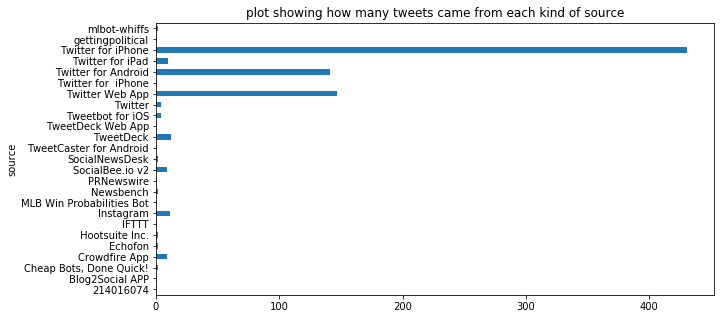

In [20]:
# len(g1df['source'].unique())
# g1df['source'].nunique()
dfq5 = g1df.groupby('source')['text'].nunique().plot(kind='barh',figsize=(10,5),title='plot showing how many tweets came from each kind of source')
dfq5;

<!-- END QUESTION -->

## Examining Text

The following questions are adapted from [https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-frequencies-in-python/](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-frequencies-in-python/)

Here is a function that removes the URLs (links) and emojis from the tweet text. By running the code that follows this function you should have then "cleanish" text.  *Note, it may not eliminate all emojis*

In [21]:
def remove_url(txt): 
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).
    Also, replaces the emoji with nothing. 

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """
    txt2 = re.sub('http[s]?://\S+', '', txt)
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    txt2 = re.sub(emoji_pattern, '', txt2)
    return txt2


In [22]:
g1Txt = [extract_text(tweet) for tweet in game1Tweets]
g1Txt_no_urls = [remove_url(tweet) for tweet in g1Txt]
g1Txt_no_urls[0:4]

['Let’s go Phils!!! Beat those trash can bangers. #Phillies #RedOctober #WorldSeries ',
 'Houston Astros vs Philadelphia Phillies World Series Live Stream 2022\nLive Here\nPhillies | Astros | World Series Game 1\n@CitizensBankPark\n#Houston #Astros #Philadelphia #Phillies\n#HoustonAstros #PhiladelphiaPhillies ',
 'Waiting on the #WorldSeries like \n#Phillies @Phillies #mlbpostseason #MLB ',
 'Pheeling Phine on this Phriday for my Phillies #teacher #Educator #fallfestival #Phillies #Philadelphia ']

## Q6 - (5 pts) 

Write code that will take your list of tweet text `g1Txt_no_urls` and creates a list of lists containing the lower case words for each tweet. 

*Hint:* you may want to think about performing the operations on a single tweet text `g1Txt_no_urls[0]` - convert it to all lower case, break it into individual words.  Think about String methods [https://docs.python.org/3.7/library/stdtypes.html#string-methods](https://docs.python.org/3.7/library/stdtypes.html#string-methods)

*Hint:* Once you get the list of words from a single tweet text, collect all the tweet's texts in another list. 

Example: 
```
words_in_tweets = 
[['test', 
  'string', 
  'text'],  # words in first tweet
 ['hello', 
  'world'],  # words in 2nd tweet 
 ['#astros, 
  'world', 
  'series']]  # words in 3rd tweet
```

In [23]:
from numpy.lib.function_base import append
words_in_tweets = []
for i in range(len(g1Txt_no_urls)):
    text = g1Txt_no_urls[i].split()
    # print(text)
    lst=[]
    for word in text:
        lst.append(word.lower())
    words_in_tweets.append(lst)
    

words_in_tweets[:3]



[['let’s',
  'go',
  'phils!!!',
  'beat',
  'those',
  'trash',
  'can',
  'bangers.',
  '#phillies',
  '#redoctober',
  '#worldseries'],
 ['houston',
  'astros',
  'vs',
  'philadelphia',
  'phillies',
  'world',
  'series',
  'live',
  'stream',
  '2022',
  'live',
  'here',
  'phillies',
  '|',
  'astros',
  '|',
  'world',
  'series',
  'game',
  '1',
  '@citizensbankpark',
  '#houston',
  '#astros',
  '#philadelphia',
  '#phillies',
  '#houstonastros',
  '#philadelphiaphillies'],
 ['waiting',
  'on',
  'the',
  '#worldseries',
  'like',
  '#phillies',
  '@phillies',
  '#mlbpostseason',
  '#mlb']]

In [24]:
grader.check("q6")

q6 results: All test cases passed!

## Q7 - (5 pts) 

Write code to take your list of lists of words and count the number of times each word appears.

You may want to look at using `itertools` to flatten the list. Also, look at the built-in Python library `collections`, which helps create a special type of a Python dictonary. The `collection.Counter` object has a useful built-in method `most_common` that will return the most commonly used words and the number of times that they are used.

In [25]:
# import itertools 
# import collections 

# flatten the list of tweets - words_in_tweets
all_words = list(itertools.chain(*words_in_tweets))

# Create a counter 
word_counts = collections.Counter(all_words)


popular_words = word_counts.most_common(10)
popular_words

[('the', 568),
 ('#phillies', 515),
 ('#worldseries', 363),
 ('#astros', 350),
 ('to', 221),
 ('a', 179),
 ('in', 171),
 ('for', 132),
 ('and', 132),
 ('is', 123)]

In [26]:
grader.check("q7")

q7 results: All test cases passed!

<!-- BEGIN QUESTION -->

## Q8 - (5 pts) 

Plot the top 25 most frequently used words with their word counts.  
Plot should be a horizontal bar chart. 

*Hint:* You may want to import the information from above into a Dataframe and use your normal plotting tools

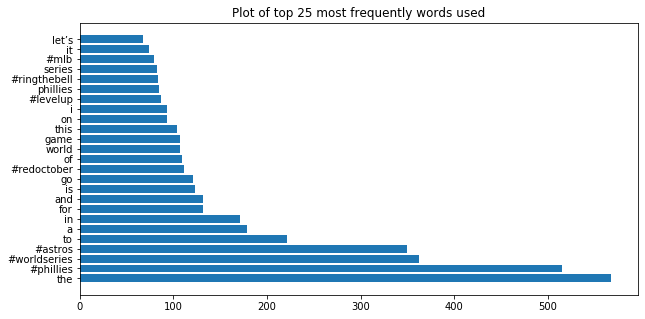

In [27]:
# Create Plot 
popular_words = word_counts.most_common(25)
# popular_words
x=[]
y=[]
for i in range(25):
    x.append(popular_words[i][0])
    y.append(popular_words[i][1])
# dfq5 = g1df.groupby('source')['text'].nunique().plot(kind='barh',figsize=(10,5),title='plot showing how many tweets came from each kind of source')
# dfq5;

plt.figure(figsize=(10,5))
plt.barh(x,y)
plt.title('Plot of top 25 most frequently words used');


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Bonus - (5 pts) 

You may see a number of very common words as the most common, e.g., the, in, to, of, etc. You may want to remove those common words, these are typically referred to as "stop words" in the text analysis communities.

The python package `nltk` is used for text analysis. It provides a list of "stop words". 

Re-analyze the tweet text by removing stop words from consideration, and plot the 20 most popular words with their frequencies.

In [28]:
# import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

["you'll",
 "you've",
 'again',
 'to',
 'those',
 "shan't",
 "isn't",
 'or',
 'whom',
 'yours']

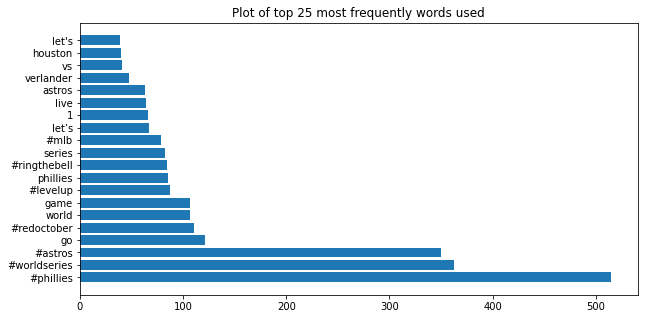

In [ ]:
# flatten the list of tweets - words_in_tweets
all_words = list(itertools.chain(*words_in_tweets))
res = filter(lambda i: i not in stop_words, all_words)

# Create a counter 
word_counts = collections.Counter(res)

popular_words = word_counts.most_common(20)
# popular_words
x=[]
y=[]
for i in range(20):
    x.append(popular_words[i][0])
    y.append(popular_words[i][1])
# dfq5 = g1df.groupby('source')['text'].nunique().plot(kind='barh',figsize=(10,5),title='plot showing how many tweets came from each kind of source')
# dfq5;

plt.figure(figsize=(10,5))
plt.barh(x,y)
plt.title('Plot of top 25 most frequently words used');



<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

**NOTE** the following cell can not be run in Colab or Deepnote.  You can work in Colab and save the results, but the export function must be run in a Jupyter environment on the campus lab machines or your own computer.  See the instruction in the Canvas assignment.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)